# 	Ride Sharing Company Analysis

### Table of Contents

* [Data Collection and Storage](#scrollTo=bitkGoQbpYjy)
    * [Initialization](#scrollTo=BRpVaT5ApYj6)
    * 1. [Load the Data](#scrollTo=0BMBI3qVpYj9)
    * [2. Learn the Data](#scrollTo=v90SRYY7qBo9)
        * [2.1. Company Data](#scrollTo=ROxmih-mpYj-)
        * [2.2. Location Data](#scrollTo=5rlgtS50pYkE)
    * [3. Data Visualization](#scrollTo=fRRq20q5pYkN)
        * [3.1. Top 10 Company](#scrollTo=Tm4RML7-pYkN)
        * [3.2. Top 10 Destination](#scrollTo=bkS297kepYkP)
    * [4. Hypothesis Test](#scrollTo=XNs-xK6fpYkR)
        * [4.1. Enrich Data](#scrollTo=iTE-jzhypYkR)
        * [4.2. Test Hypothesis](#scrollTo=JjogsF5tpYkY)
* [Conclusions](#scrollTo=G9WBxaXgpYkp)



# Data Collection and Storage

We worked as analysts for Zuber, a new ride-sharing company launched in Chicago. Our job was to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on travel.
Using databases, we will analyze data from competitors and test hypotheses regarding the effect of weather on trip frequency.

**Goals:**
- Identifying the top 10 delivery regions
- Display a chart of companies that have the number of deliveries 
- Display a graph of the top 10 regions that passengers go to  

**Hypothesis Test:**
- The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays 

## Initialization

In [1]:
# load all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 1. Load the Data

In [2]:
# load all datas

df_company = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
df_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
df_loop_ohare = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

## 2. Learn the Data

### 2.1. Company Data

**Data Description**
- `company_name`: taxi company name
- `trips_amount`: number of trips for each taxi company on November 15-16, 2017.

In [3]:
# display sample company data
df_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [4]:
# display the unique value
df_company['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S.Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih company',
       '2192 - 73487 Zeymane Corp',
       '2241 - 44667 - Felman Corp, Manuel Alonso', '24 Seven Taxi',
       '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.',
       '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.',
       '303 Taxi', '3556 - 36214 RC Andrews Cab',
       '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises',
       '3721 - Santamaria Express, Alvaro Santamaria',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha ride inc', '6743 - 78771 Luhak Corp'

In [5]:
# Display company dataset information
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# display descriptive statistics of data
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


The dataset consists of **2** columns and **64** rows, there are no *missing values* in the data, and the data type is also correct where the `company_name` column is defined as **object** and the `trips_amount` column is defined as **int64**.

The description table also shows that the company with the highest number of trips has **19558** and the company with the lowest number has **2** trips, with an average of **2145** on November 15-16, 2017, meaning that there are companies that only have 1 trip in one day, showing a very significant difference between one company and another.

But we see that there are some **registers** starting with a number so we will study it further to see if it has an effect.

### 2.2. Location Data

**Data Description:**
- `dropoff_location_name`: the name of the region in Chicago where the trip ends
- `average_trips`: average number of trips that ended in each region in November 2017.

In [7]:
# display sample dataset location
df_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [8]:
# display the unique value
df_trips['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [9]:
# Display dataset location information
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The `average_trips` column is defined as **float**, so we will change it as the type should be **integer**, as it shows the average trips.

In [10]:
# convert average_trips column
df_trips['average_trips'] = df_trips['average_trips'].apply(np.int64)
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
# display the data again after cleaning
df_trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


In [12]:
# display descriptive statistics of the data
df_trips.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


The above dataset consists of **2** columns and **94** rows. There are no *missing values* in the above data. The data type should be correct, the `dropoff_location_name` column is defined as **object**, and the `average_trips` column is defined as **int**.  

The region's highest number of trips occurred, with a total of **10727** in November 2017 and traveled with a total of **1** being the least destination in November 2017. With an average of **599** trips to each region in the month.

## 3. Data Visualization

### 3.1. Top 10 Company

In [13]:
# Displays the 10 companies with the most traffic
top_company = df_company.sort_values(by='trips_amount', ascending=False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


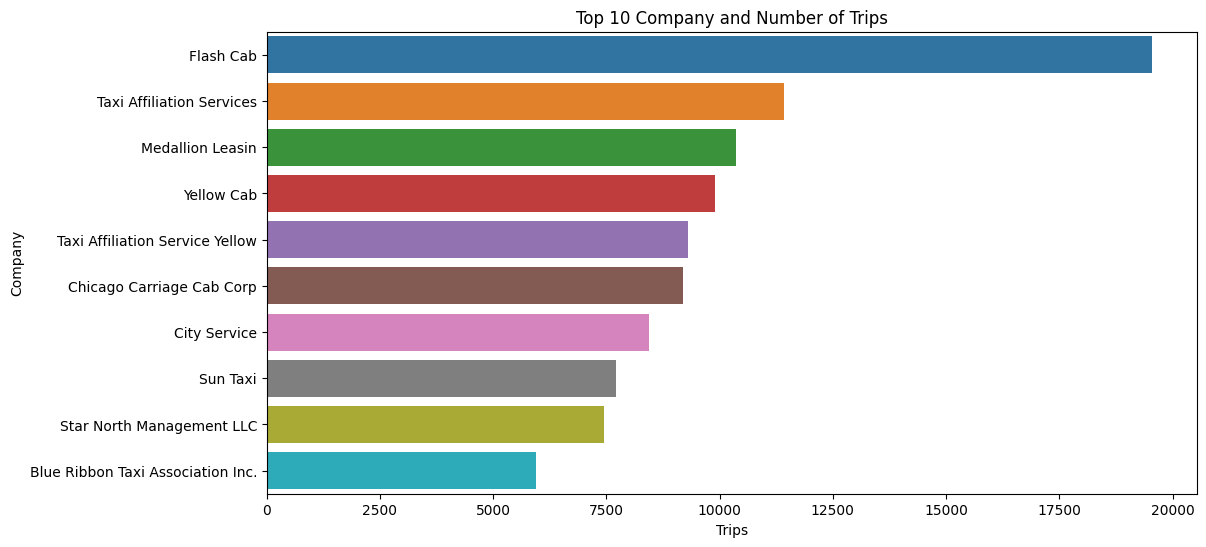

In [14]:
# display graphics
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_company, x='trips_amount', y='company_name')
ax.set_xlabel('Trips')
ax.set_ylabel('Company')
ax.set_title('Top 10 Company and Number of Trips')
plt.show()

From the diagram above, we know that **Flash Cab** was the company with the highest number of trips on November 15-16, 2017. With a total of **19558** or close to 20000, this number **Flash Cab** significantly outperformed other companies by a margin of about **42%** from the **Taxi Affiliation Service** company, which took second place.

### 3.2. Top 10 Destination

In [15]:
# Display the 10 destinations with the highest count
top_trips = df_trips.sort_values(by='average_trips', ascending=False).head(10)
top_trips

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


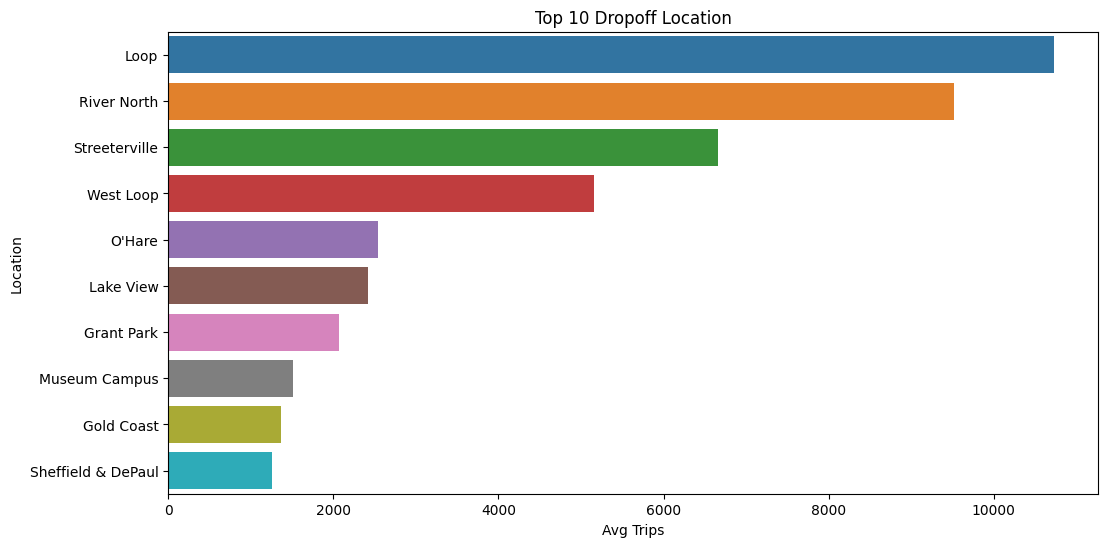

In [16]:
# display graphics
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_trips, x='average_trips', y='dropoff_location_name')
ax.set_xlabel('Avg Trips')
ax.set_ylabel('Location')
ax.set_title('Top 10 Dropoff Location')
plt.show()

From the graph above we can conclude that **Loop** was the highest delivery destination in November 2017.

## 4. Hypothesis Test

### 4.1. Enrich Data

In [17]:
# display sample dataset duration
df_loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [18]:
# Display data information
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
# display descriptive statistics of the data
df_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


The data above has **3** columns and **1068** rows. The `start_ts` column contains the travel time and is not defined as **timestamp** but **float**, so we will change it first. For convenience, we will add a minutes column. 

The most extended trip took **124** minutes or more than 2 hours. The shortest time was **0** seconds which may have been due to a cancelled trip, with an average travel time of **34** minutes per trip or approximately half an hour. 

In [20]:
# Change the start_ts column type
df_loop_ohare['start_ts'] =  pd.to_datetime(df_loop_ohare['start_ts'], infer_datetime_format=True)
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [21]:
# Adding a minute column
df_loop_ohare['duration_minutes'] = np.round(df_loop_ohare['duration_seconds'] / 60)
df_loop_ohare

,start_ts,weather_conditions,duration_seconds,duration_minutes
0,2017-11-25 16:00:00,Good,2410.0,40.0
1,2017-11-25 14:00:00,Good,1920.0,32.0
2,2017-11-25 12:00:00,Good,1543.0,26.0
3,2017-11-04 10:00:00,Good,2512.0,42.0
4,2017-11-11 07:00:00,Good,1440.0,24.0
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,0.0
1064,2017-11-11 10:00:00,Good,1318.0,22.0
1065,2017-11-11 13:00:00,Good,2100.0,35.0
1066,2017-11-11 08:00:00,Good,1380.0,23.0


We will categorize the data into two conditions namely `good` and `bad`.

In [22]:
# Checking the distribution of good and bad weather
df_loop_ohare.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                             avg_min=('duration_minutes','mean'), total_min=('duration_minutes',
                                            'sum')).reset_index()

,weather_conditions,amount,avg_sec,avg_min,total_min
0,Bad,180,2427.205556,40.450000,7281.0
1,Good,888,1999.675676,33.332207,29599.0


From the table above, we get an *overview* that there is a significant difference between **bad** and **good** weather conditions during the trip. **180** deliveries during **bad** conditions and **888** deliveries during **good** conditions. 

Next, we will check and resolve if there are **outliers** in the data, and then we will split into two datasets based on the conditions for hypothesis testing.

In [23]:
# checking for and resolving outliers
Q1 = df_loop_ohare['duration_seconds'].quantile(0.25)
Q3 = df_loop_ohare['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR                  

df_loop_ohare = df_loop_ohare[ ~((df_loop_ohare['duration_seconds'] < lower_bound) | (df_loop_ohare['duration_seconds'] > upper_bound)) ]

In [24]:
# Checking the distribution of good and bad weather
df_loop_ohare.groupby('weather_conditions').agg(amount=('start_ts','count'), avg_sec=('duration_seconds', 'mean'),
                                             avg_min=('duration_minutes','mean'), total_min=('duration_minutes',
                                            'sum')).reset_index()

,weather_conditions,amount,avg_sec,avg_min,total_min
0,Bad,179,2412.944134,40.212291,7198.0
1,Good,883,1979.266138,32.992072,29132.0


After we checked and resolved the *outliers* there was a slight change in the data, i.e. the number of deliveries became **179** during bad weather and **883** during good weather, and the average delivery time also had a slight change.

In [25]:
# Filtering the dataset based on the genre to be tested
df_weather_good = df_loop_ohare.query('weather_conditions == "Good"').reset_index(drop=True)
df_weather_bad = df_loop_ohare.query('weather_conditions == "Bad"').reset_index(drop=True)

### 4.2. Test Hypothesis

Hypothesis :

- H₀ : Average trip duration from the Loop to O'Hare International Airport does not change on rainy Saturdays
- H₁ : The average duration of a trip from the Loop to O'Hare International Airport changes on rainy Saturdays

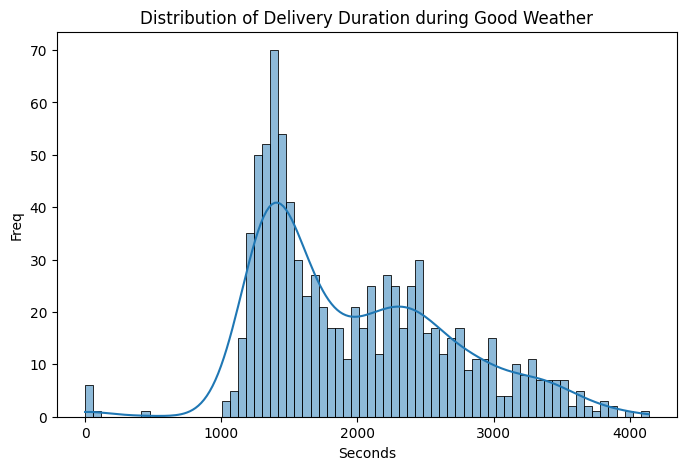

In [26]:
# Display a diagram to find out the distribution of good weather
plt.figure(figsize=(8,5))
sns.histplot(df_weather_good['duration_seconds'], bins=70, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribution of Delivery Duration during Good Weather')
plt.show()

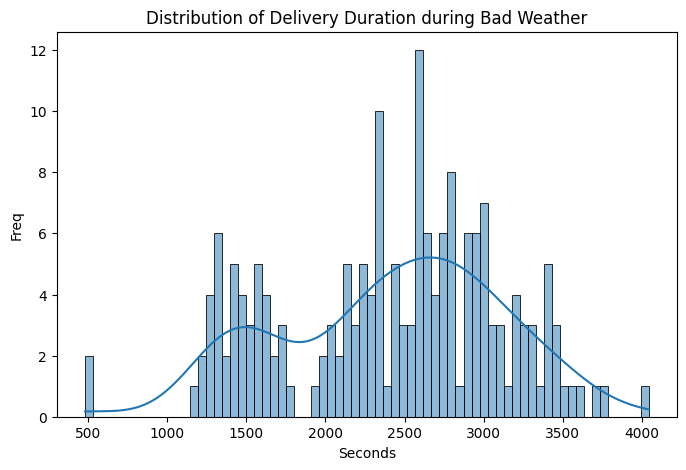

In [27]:
# Display a diagram to find out the distribution of bad weather
plt.figure(figsize=(8,5))
sns.histplot(df_weather_bad['duration_seconds'], bins=70, kde=True)
plt.xlabel('Seconds')
plt.ylabel('Freq')
plt.title('Distribution of Delivery Duration during Bad Weather')
plt.show()

To determine `equal_var` is True or False, we will use the **Levene Test** because, as we can see, one of the diagrams shows a right-skewed distribution or **Non-normal Distribution**. We determine if the `p-value` is more than **0.05**, then we can assume that both samples have `equal variance`.

In [28]:
# Determine if the two samples have equal or unequal variance
st.levene(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'])

LeveneResult(statistic=0.24647542861629418, pvalue=0.6196707782686355)

The `pvalue` shows **0.61**, so we can determine that the two populations have the same variance, as it is higher than the specified **Alpha** value.

In [29]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_weather_good['duration_seconds'], df_weather_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.2430038032744411e-13
We reject the null hypothesis


From the test above, we found that `The average duration of a trip from the Loop to O'Hare International Airport changes on rainy Saturdays`, so we can conclude that weather conditions affect the duration of the trip, which in rainy weather conditions will take an average of 7-8 minutes longer.

# Conclusions

**1. Data Collection and Preprocessing Stage**
- This project starts with external data collection through websites, studying databases, and analyzing data from competitors.
- We have **3** datasets to analyze. The first dataset contains taxi company information, the second data contains delivery location information, and the third data contains information about the time required for delivery in rainy and non-rainy weather.
- First, we load **2** datasets *company* and *dropoff location*. We study the contents of the data, ensuring that the data types match.

**2. Explanatory Data Analysis and Hypothesis Testing**
- Next, we analyze the companies with the most trips and popular destinations and display the graphs.
- In the next step, we load the weather data and analyze whether the weather affects the delivery duration using the **t-test** method.

**3. Result and Recommendation**
- The company **Flash Cab** has significantly more deliveries than its competitors, with a difference of over **40%** compared to the second place. Other data also shows that **Loop** and **River North** are the most popular destinations from different locations.
- The hypothesis test results show that `The average duration of a trip from the Loop to O'Hare International Airport changes on rainy Saturdays', so we can conclude that weather conditions can affect the time passengers arrive at their destination with an average travel time difference of 7 minutes longer in rainy weather.
- We need to learn more about why the **Flash Cab** company has the highest number of trips. We also know that **Loop** and **River North** are popular destinations, so *drivers* can choose to wait for passengers in these areas. In rainy weather, we can inform *customers* that there may be delays in pick-up and drop-off times so passengers can book a taxi earlier.